In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

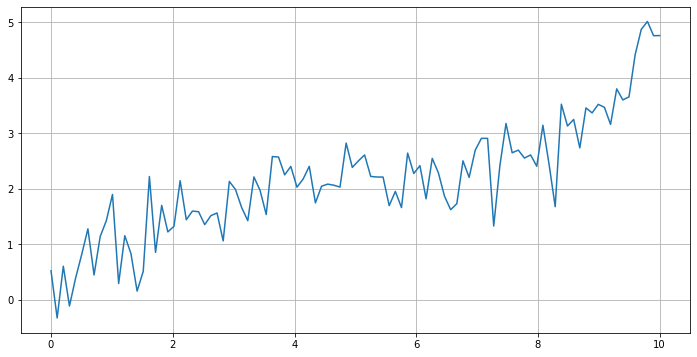

In [2]:
x = np.linspace(0,10,100)
y = x - 0.15*x**2+0.01*x**3 - 0.001*x**4+0.0001*x**5 + 0.4*np.random.randn(1,x.shape[0])[0]
x = x.reshape(-1,1)

plt.figure(figsize=(12,6))
plt.plot(x,y)
plt.grid()

In [3]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y, test_size=0.85, random_state=42)

In [4]:
p = PolynomialFeatures(7, include_bias=False)
X_tr = p.fit_transform(x_tr)
X_ts = p.transform(x_ts)

In [5]:
X_tr.shape

(15, 7)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
X_tr = sc.fit_transform(X_tr)
X_ts = sc.transform(X_ts)

In [8]:
lg_r,lg_l,pred_r,pred_l = [], [], [], []
list_r=list(1.5**np.linspace(-20,20,100))
list_l=list(2**np.linspace(-20,20,100))

In [9]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X_tr, y_tr)
  m_l = Lasso(alpha=list_l[i]).fit(X_tr, y_tr)
  lg_r.append(m_r)
  pred_r.append(m_r.coef_)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

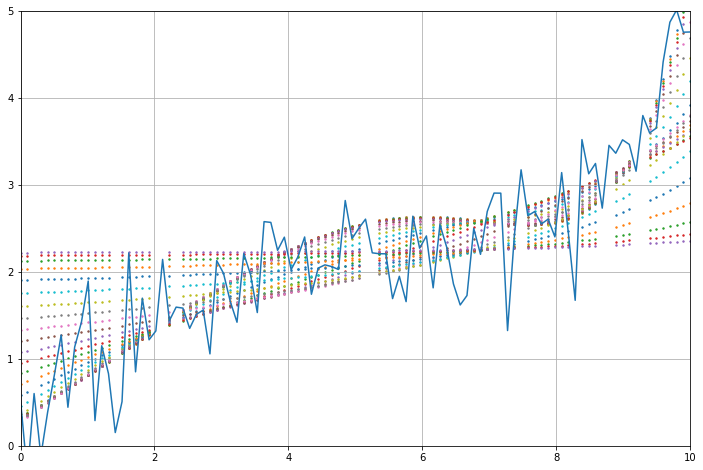

In [10]:
plt.figure(figsize=[12,8])
plt.plot(x,y)
for i, m in enumerate(lg_r):
  if i%4 == 0:
    plt.scatter(x_ts,m.predict(X_ts),s=2)
plt.xlim(0,10)
plt.ylim(0,5)
plt.grid()

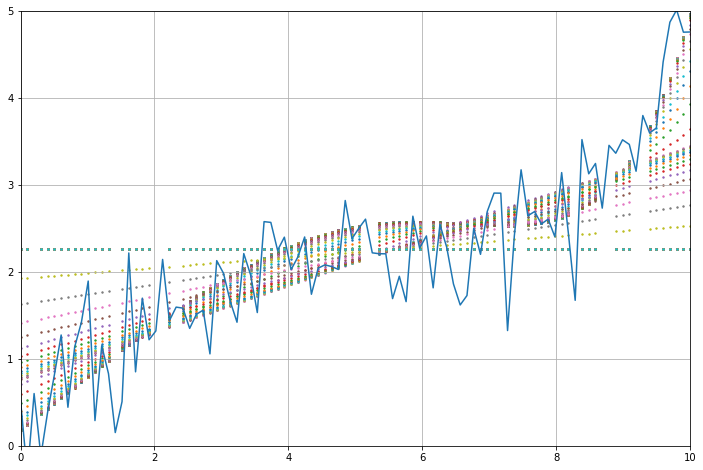

In [11]:
plt.figure(figsize=[12,8])
plt.plot(x,y)
for i, m in enumerate(lg_l):
    plt.scatter(x_ts,m.predict(X_ts),s=2)
plt.xlim(0,10)
plt.ylim(0,5)
plt.grid()

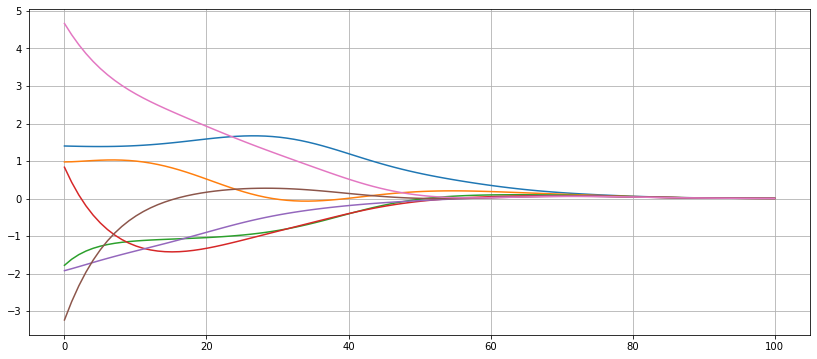

In [12]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.grid()    


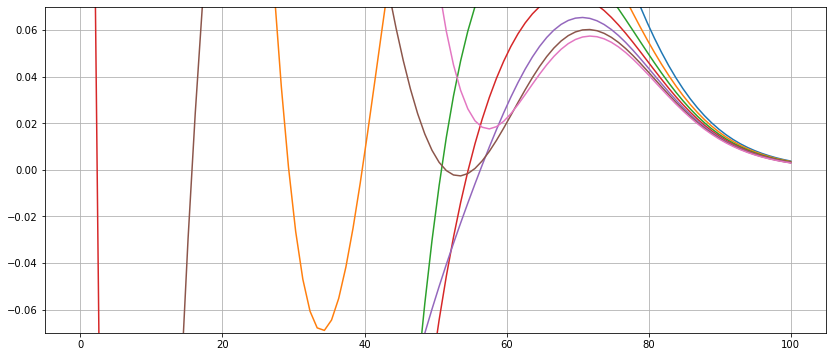

In [13]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.ylim(-0.07,0.07)    
plt.grid()

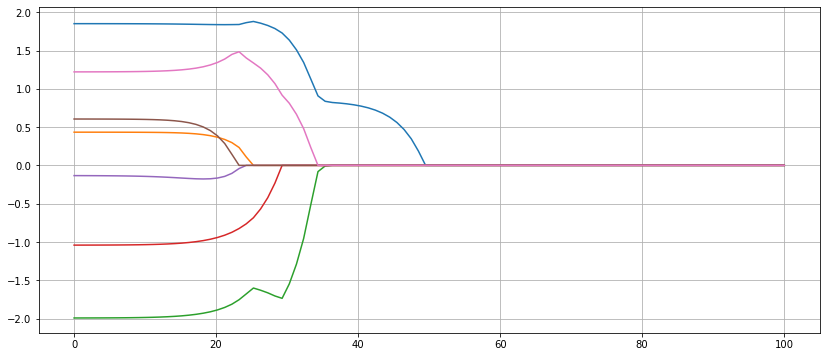

In [14]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))  
plt.grid()    


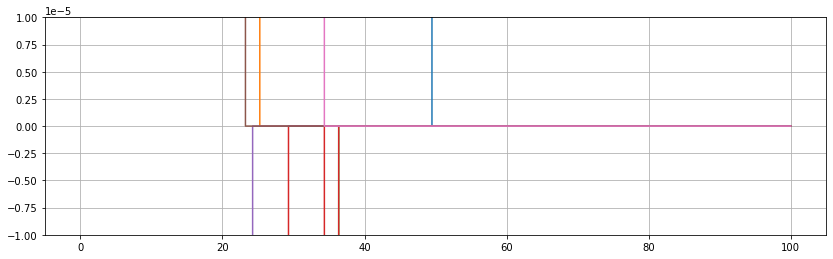

In [15]:
plt.figure(figsize=[14,4])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))
plt.ylim(-0.00001,0.00001)   
plt.grid() 

In [16]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [17]:
lg_r,lg_l,pred_r,pred_l = [], [], [], []
list_r=list(1.5**np.linspace(-20,20,100))
list_l=list(2**np.linspace(-20,20,100))

In [18]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X, y)
  m_l = Lasso(alpha=list_l[i]).fit(X, y)
  lg_r.append(m_r)
  pred_r.append(m_r.coef_)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

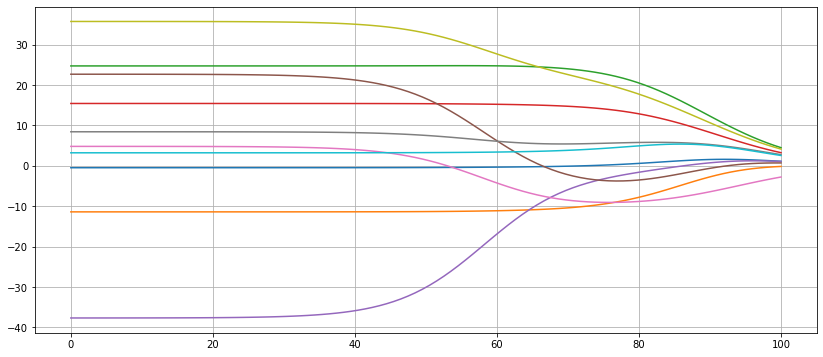

In [20]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.grid()  

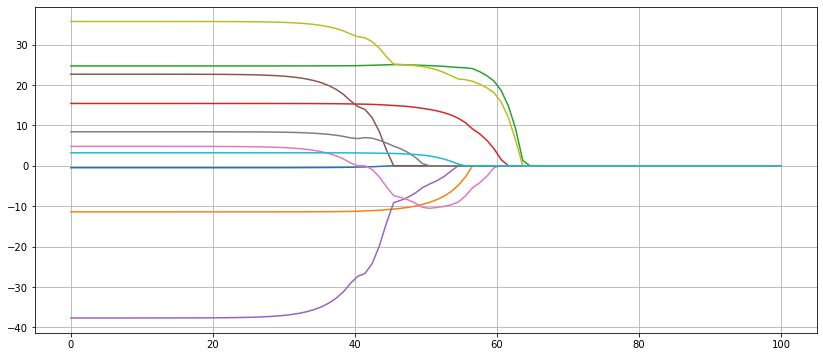

In [21]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))  
plt.grid() 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LinearRegression().fit(X_train, y_train)
clf.predict(X_test)
# fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)           

array([241.84730258, 250.12303941, 164.96456549, 119.11639346,
       188.23120303, 260.56079379, 113.07583812, 190.54117538,
       151.8883747 , 236.50848375, 168.76844138, 180.52719713,
       109.16037049,  90.20148392, 244.73990469,  90.58113696,
       152.51268196,  66.97735025,  98.0467335 , 215.39557064,
       197.70737206, 160.9176914 , 162.88584001, 158.25373793,
       202.44823294, 168.46663088, 119.87243699,  83.05669211,
       189.9839726 , 163.02279586, 177.07828326,  82.6702699 ,
       144.53204953, 146.07901596, 141.73841253, 195.18658206,
       164.18043648, 189.14768927, 128.13330927, 206.12996392,
        82.64273523, 164.94912645, 144.46057692, 182.0519825 ,
       178.41355601,  72.5504089 , 142.69750371, 140.43671531,
       121.75256103, 233.70553551, 162.07809758,  76.90270416,
       155.68916375, 156.64052259, 238.11357481, 175.75735587,
       190.82555855, 119.48230582, 131.3142863 , 172.2453037 ,
       214.44479397, 171.30900357, 156.69146772, 110.97

In [41]:
print(datasets.load_diabetes()['target'])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 